## Getting the symbol probabilities

    After getting compression_metrics.csv


In [ ]:
import pandas as pd
import csv
from typing import Dict

def parse_symbol_probabilities(prob_string: str) -> Dict[str, float]:
    """
    Parse symbol probability string into a dictionary
    
    Args:
        prob_string (str): Raw probability string
    
    Returns:
        Dict[str, float]: Parsed symbol probabilities
    """
    probabilities = {}
    # Remove trailing semicolon and split
    symbols = prob_string.rstrip('; ').split('; ')
    
    for symbol_prob in symbols:
        symbol, prob_str = symbol_prob.split(':')
        # Remove '%' and convert to float
        prob = float(prob_str.rstrip('%'))
        probabilities[symbol] = prob
    
    return probabilities

def transform_probabilities_to_csv(input_csv: str, output_csv: str):
    """
    Transform input CSV with symbol probabilities to expanded CSV
    
    Args:
        input_csv (str): Input CSV file path
        output_csv (str): Output CSV file path
    """
    # Read input CSV
    df = pd.read_csv(input_csv)
    
    # Process each row's symbol probabilities
    all_symbols = set()
    processed_data = []
    
    for _, row in df.iterrows():
        probabilities = parse_symbol_probabilities(row['Symbol Probabilities'])
        all_symbols.update(probabilities.keys())
        processed_data.append(probabilities)
    
    # Create a new DataFrame with all symbols as columns
    result_df = pd.DataFrame(processed_data, columns=list(all_symbols))
    
    # Add original columns back
    result_df = pd.concat([df.drop('Symbol Probabilities', axis=1), result_df], axis=1)
    
    # Save to new CSV
    result_df.to_csv(output_csv, index=False)
    
    print(f"Transformed CSV saved to {output_csv}")

input_csv = 'compression_metrics.csv'
output_csv = 'expanded_symbol_probabilities.csv'

transform_probabilities_to_csv(input_csv, output_csv)

Transformed CSV saved to expanded_symbol_probabilities.csv


Total Rows in DataFrame: 3
Total Unique Symbols: 44


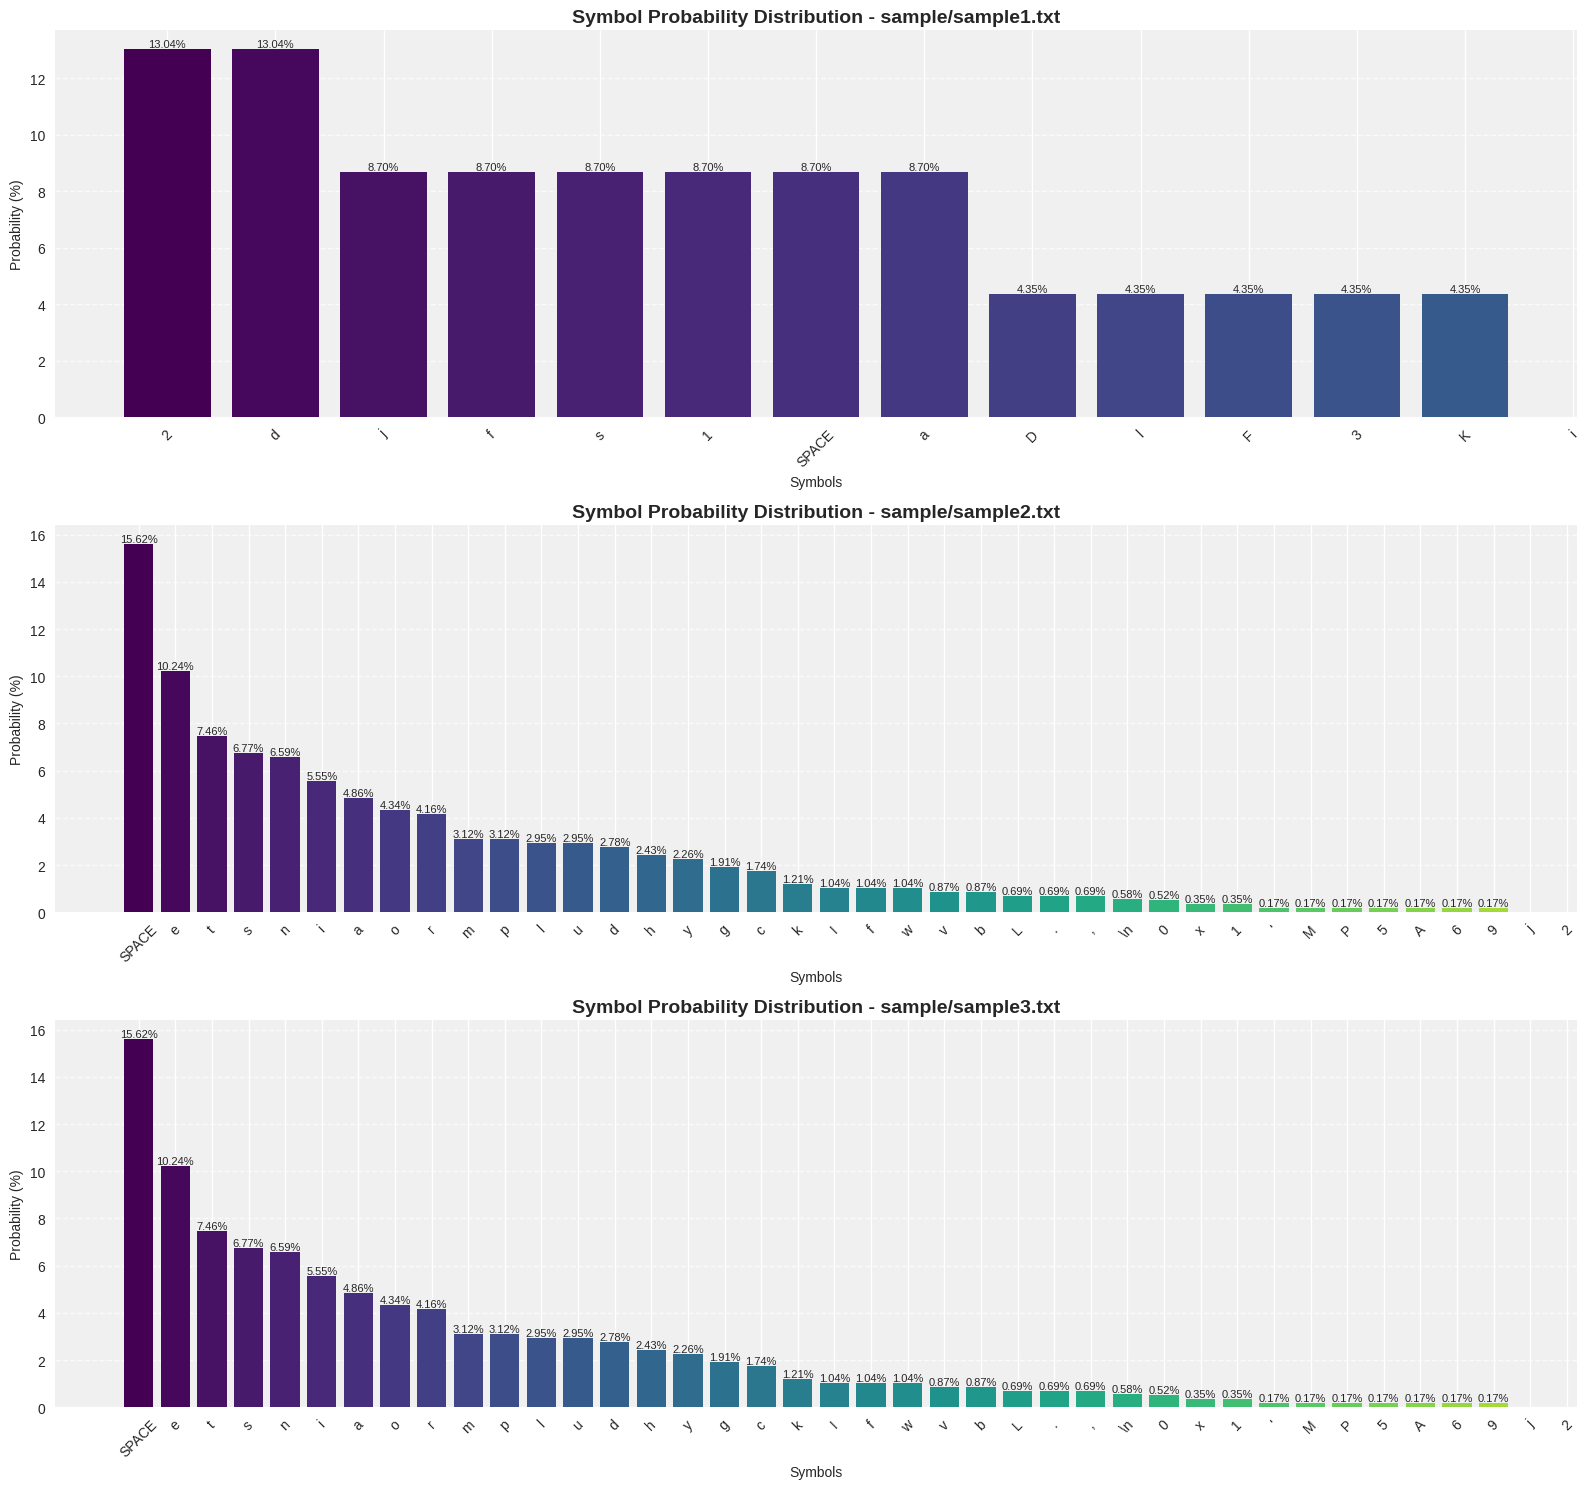

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_symbol_probabilities(df, top_n=100):
    """
    Clean and Beautiful Symbol Probability Visualization
    Handles multiple rows in CSV with filename-specific subplots
    """
    # Preprocess DataFrame
    symbol_columns = df.columns[5:]
    symbol_df = df[symbol_columns].apply(pd.to_numeric, errors='coerce')
    
    # Print total rows and symbols
    print(f"Total Rows in DataFrame: {len(df)}")
    print(f"Total Unique Symbols: {len(symbol_columns)}")
    
    # Create figure with subplots for each filename
    fig, axes = plt.subplots(len(df), 1, figsize=(16, 5*len(df)))
    
    # Ensure axes is always a list
    if len(df) == 1:
        axes = [axes]
    
    for row_idx, row in df.iterrows():
        filename = row['Filename']
        
        # Compute probabilities for this row
        current_probs = row[symbol_columns].apply(pd.to_numeric, errors='coerce')
        
        # Sort probabilities in descending order
        sorted_probs = current_probs.sort_values(ascending=False)
        
        # Select top N symbols
        top_symbols = sorted_probs.head(top_n)
        
        # Color palette
        colors = plt.cm.viridis(np.linspace(0, 1, len(top_symbols)))
        
        # Bar Plot with Enhanced Aesthetics
        bars = axes[row_idx].bar(top_symbols.index, top_symbols.values, color=colors)
        
        # Title and labels for each subplot
        axes[row_idx].set_title(f'Symbol Probability Distribution - {filename}', 
                                 fontsize=14, fontweight='bold')
        axes[row_idx].set_xlabel('Symbols', fontsize=10)
        axes[row_idx].set_ylabel('Probability (%)', fontsize=10)
        axes[row_idx].tick_params(axis='x', rotation=45)
        axes[row_idx].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[row_idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', 
                     ha='center', va='bottom', fontsize=8)
        
        # Subtle background
        axes[row_idx].set_facecolor('#f0f0f0')
    
    plt.tight_layout()
    plt.show()

# Read the CSV file
df = pd.read_csv('expanded_symbol_probabilities.csv')

# Plot Symbol Probabilities
plot_symbol_probabilities(df)


Total Rows in DataFrame: 3
Total Unique Symbols: 44


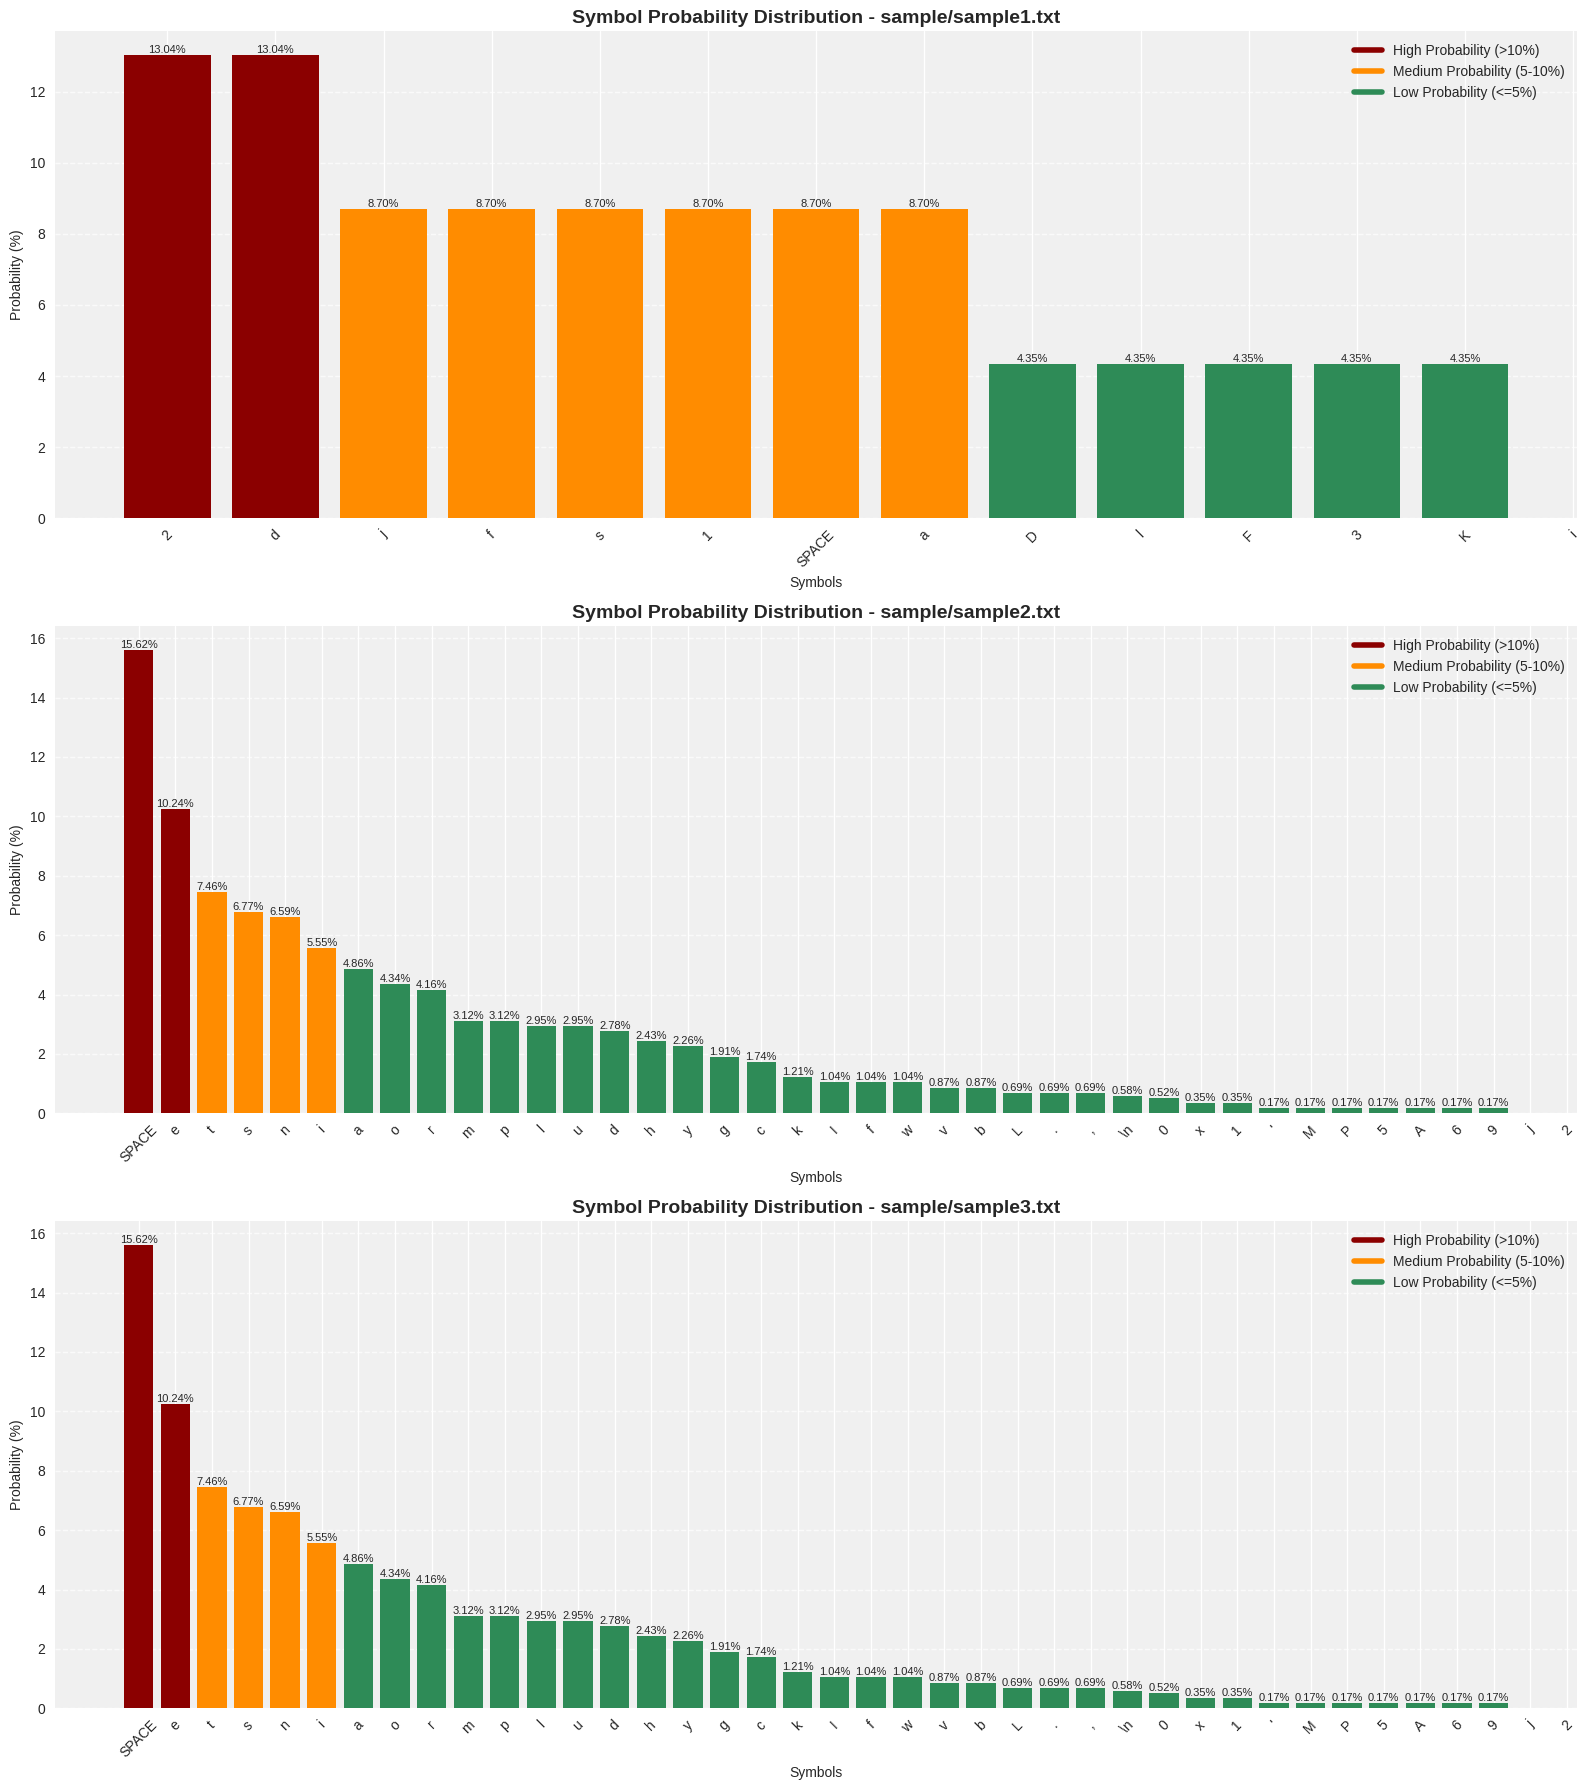

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_symbol_probabilities_color_coded(df, top_n=100):
    """
    Visualizes Symbol Probability Distribution with Color-Coded Groups
    """
    # Preprocess DataFrame
    symbol_columns = df.columns[5:]
    symbol_df = df[symbol_columns].apply(pd.to_numeric, errors='coerce')
    
    # Print total rows and symbols
    print(f"Total Rows in DataFrame: {len(df)}")
    print(f"Total Unique Symbols: {len(symbol_columns)}")
    
    # Create figure with subplots for each filename
    fig, axes = plt.subplots(len(df), 1, figsize=(16, 6 * len(df)))
    
    # Ensure axes is always a list
    if len(df) == 1:
        axes = [axes]
    
    for row_idx, row in df.iterrows():
        filename = row['Filename']
        
        # Compute probabilities for this row
        current_probs = row[symbol_columns].apply(pd.to_numeric, errors='coerce')
        
        # Sort probabilities in descending order
        sorted_probs = current_probs.sort_values(ascending=False)
        
        # Select top N symbols
        top_symbols = sorted_probs.head(top_n)
        
        # Assign color groups based on probability ranges
        color_groups = []
        for prob in top_symbols.values:
            if prob > 10:  # High probability
                color_groups.append('darkred')
            elif 5 < prob <= 10:  # Medium probability
                color_groups.append('darkorange')
            else:  # Low probability
                color_groups.append('seagreen')
        
        # Bar Plot with Color-Coded Groups
        bars = axes[row_idx].bar(top_symbols.index, top_symbols.values, color=color_groups)
        
        # Title and labels for each subplot
        axes[row_idx].set_title(f'Symbol Probability Distribution - {filename}', 
                                 fontsize=14, fontweight='bold')
        axes[row_idx].set_xlabel('Symbols', fontsize=10)
        axes[row_idx].set_ylabel('Probability (%)', fontsize=10)
        axes[row_idx].tick_params(axis='x', rotation=45)
        axes[row_idx].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[row_idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', 
                     ha='center', va='bottom', fontsize=8)
        
        # Subtle background
        axes[row_idx].set_facecolor('#f0f0f0')
        
        # Add legend for color groups
        custom_legend = [
            plt.Line2D([0], [0], color='darkred', lw=4, label='High Probability (>10%)'),
            plt.Line2D([0], [0], color='darkorange', lw=4, label='Medium Probability (5-10%)'),
            plt.Line2D([0], [0], color='seagreen', lw=4, label='Low Probability (<=5%)')
        ]
        axes[row_idx].legend(handles=custom_legend, loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Read the CSV file
df = pd.read_csv('expanded_symbol_probabilities.csv')

# Plot Symbol Probabilities with Color-Coded Groups
plot_symbol_probabilities_color_coded(df)
